# Scaling Numeric DATA

## Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [22]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import pydataset

# Need to add this line to get plots to show!
%matplotlib inline

# Stats
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = w.get_zillow_data()
df

csv file found and loaded


,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA,0.03
2152858,4,3.0,2262,960756,2015,13494.52,Orange,0.01
2152859,4,4.5,3127,536061,2014,6244.16,Orange,0.01
2152861,3,2.5,1974,424353,2015,5302.70,Orange,0.01


### Train, Validate and Test

In [3]:
train, validate, test = w.get_zillow_split(df)

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [4]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01


In [5]:
print('train shape:', train.shape)
print('validate shape:', validate.shape)

train shape: (1219902, 8)
validate shape: (406635, 8)


In [6]:
train.describe()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,tax_rate
count,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06
mean,3.258273e+00,2.141407e+00,1.751959e+03,3.635321e+05,1.960259e+03,4.509706e+03,1.182580e-02
std,8.974253e-01,8.354628e-01,7.260309e+02,2.432958e+05,2.155127e+01,2.845417e+03,7.978398e-02
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,1.336000e+01,0.000000e+00
25%,3.000000e+00,2.000000e+00,1.242000e+03,1.818500e+05,1.949000e+03,2.458920e+03,1.000000e-02
50%,3.000000e+00,2.000000e+00,1.587000e+03,3.130040e+05,1.958000e+03,3.941860e+03,1.000000e-02
75%,4.000000e+00,3.000000e+00,2.108000e+03,4.923168e+05,1.974000e+03,5.943167e+03,1.000000e-02
max,1.600000e+01,2.000000e+01,2.280000e+04,1.202999e+06,2.016000e+03,1.003793e+05,7.253000e+01


In [7]:
X_train, X_validate, X_test= train[['bedrooms', 'bathrooms','area','yearbuilt','taxamount','tax_rate','county']], validate[['bedrooms', 'bathrooms','area','yearbuilt','taxamount','tax_rate','county']], test[['bedrooms', 'bathrooms','area','yearbuilt','taxamount','tax_rate','county']]

y_train, y_validate, y_test = train.taxvalue, validate.taxvalue, test.taxvalue

In [8]:
X_train

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,4,2.5,2987,2006,13617.38,0.02,Orange
1723553,3,2.0,3013,1977,5768.57,0.01,LA
718174,4,3.0,2572,1986,4944.11,0.01,LA
1663205,3,1.0,1589,1959,4031.78,0.01,LA
1087891,3,2.0,1727,1962,2708.80,0.01,Ventura
...,...,...,...,...,...,...,...
531544,3,2.0,1610,1984,3001.96,0.01,LA
424806,2,1.0,900,1938,3323.92,0.01,LA
518081,3,3.0,1841,1955,1731.15,0.01,LA
669341,3,2.0,1406,1956,4559.86,0.01,LA


In [9]:
X_tr_mm_scaler, X_v_mm_scaler, X_tr_mm_inv = w.get_minmax_train_scaler(X_train, X_validate)
X_tr_mm_scaler

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,0.2500,0.125,0.130971,0.953488,0.135544,0.000276,Orange
1723553,0.1875,0.100,0.132111,0.818605,0.057342,0.000138,LA
718174,0.2500,0.150,0.112768,0.860465,0.049128,0.000138,LA
1663205,0.1875,0.050,0.069652,0.734884,0.040038,0.000138,LA
1087891,0.1875,0.100,0.075705,0.748837,0.026856,0.000138,Ventura
...,...,...,...,...,...,...,...
531544,0.1875,0.100,0.070573,0.851163,0.029777,0.000138,LA
424806,0.1250,0.050,0.039432,0.637209,0.032985,0.000138,LA
518081,0.1875,0.150,0.080705,0.716279,0.017115,0.000138,LA
669341,0.1875,0.100,0.061626,0.720930,0.045299,0.000138,LA


In [10]:
X_train

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,4,2.5,2987,2006,13617.38,0.02,Orange
1723553,3,2.0,3013,1977,5768.57,0.01,LA
718174,4,3.0,2572,1986,4944.11,0.01,LA
1663205,3,1.0,1589,1959,4031.78,0.01,LA
1087891,3,2.0,1727,1962,2708.80,0.01,Ventura
...,...,...,...,...,...,...,...
531544,3,2.0,1610,1984,3001.96,0.01,LA
424806,2,1.0,900,1938,3323.92,0.01,LA
518081,3,3.0,1841,1955,1731.15,0.01,LA
669341,3,2.0,1406,1956,4559.86,0.01,LA


In [11]:
X_tr_std_scaler, X_v_std_scaler = w.get_std_train_scaler(X_train, X_validate)
X_tr_std_scaler

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,0.826506,0.429214,1.701087,2.122405,3.200824,0.102454,Orange
1723553,-0.287794,-0.169257,1.736898,0.776777,0.442418,-0.022884,LA
718174,0.826506,1.027685,1.129485,1.194385,0.152668,-0.022884,LA
1663205,-0.287794,-1.366198,-0.224452,-0.058441,-0.167964,-0.022884,LA
1087891,-0.287794,-0.169257,-0.034377,0.080762,-0.632915,-0.022884,Ventura
...,...,...,...,...,...,...,...
531544,-0.287794,-0.169257,-0.195528,1.101584,-0.529886,-0.022884,LA
424806,-1.402093,-1.366198,-1.173448,-1.032862,-0.416736,-0.022884,LA
518081,-0.287794,1.027685,0.122641,-0.244045,-0.976503,-0.022884,LA
669341,-0.287794,-0.169257,-0.476508,-0.197644,0.017626,-0.022884,LA


In [12]:
X_tr_rbs_scaler, X_v_rbs_scaler = w.get_robust_train_scaler(X_train, X_validate)
X_tr_rbs_scaler

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,1.0,0.5,1.616628,1.92,2.776932,0.01,Orange
1723553,0.0,0.0,1.646651,0.76,0.524277,0.00,LA
718174,1.0,1.0,1.137413,1.12,0.287652,0.00,LA
1663205,0.0,-1.0,0.002309,0.04,0.025808,0.00,LA
1087891,0.0,0.0,0.161663,0.16,-0.353896,0.00,Ventura
...,...,...,...,...,...,...,...
531544,0.0,0.0,0.026559,1.04,-0.269757,0.00,LA
424806,-1.0,-1.0,-0.793303,-0.80,-0.177352,0.00,LA
518081,0.0,1.0,0.293303,-0.12,-0.634487,0.00,LA
669341,0.0,0.0,-0.209007,-0.08,0.177370,0.00,LA


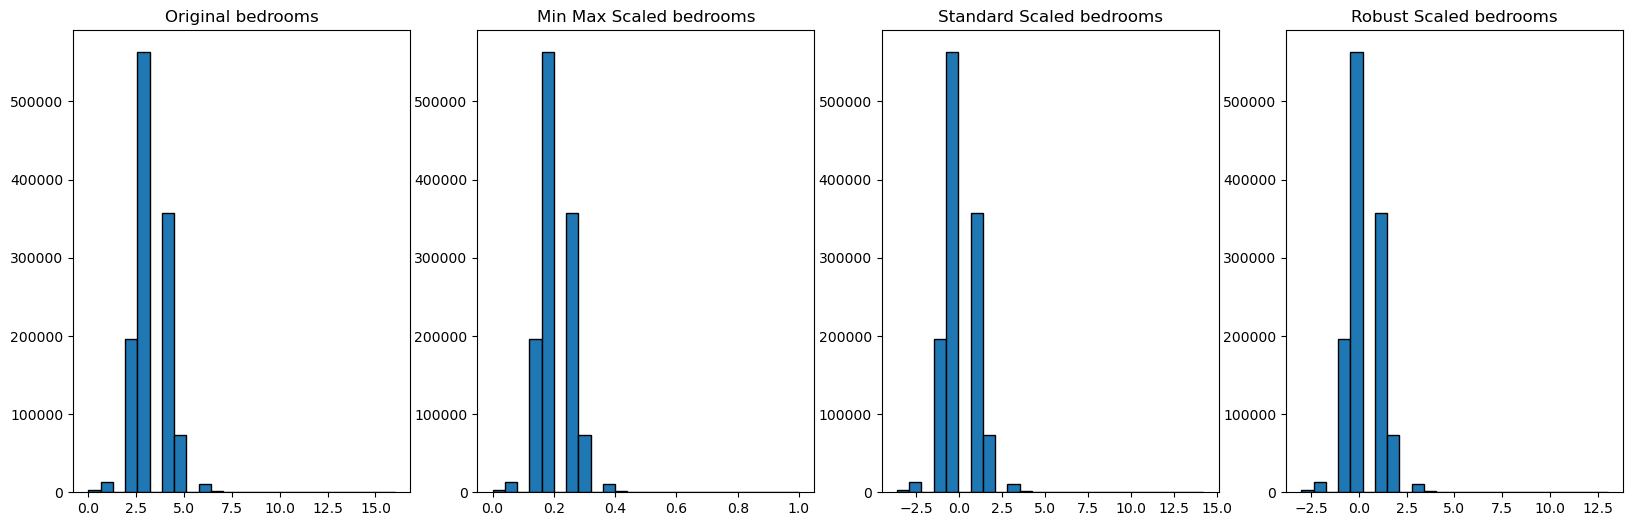

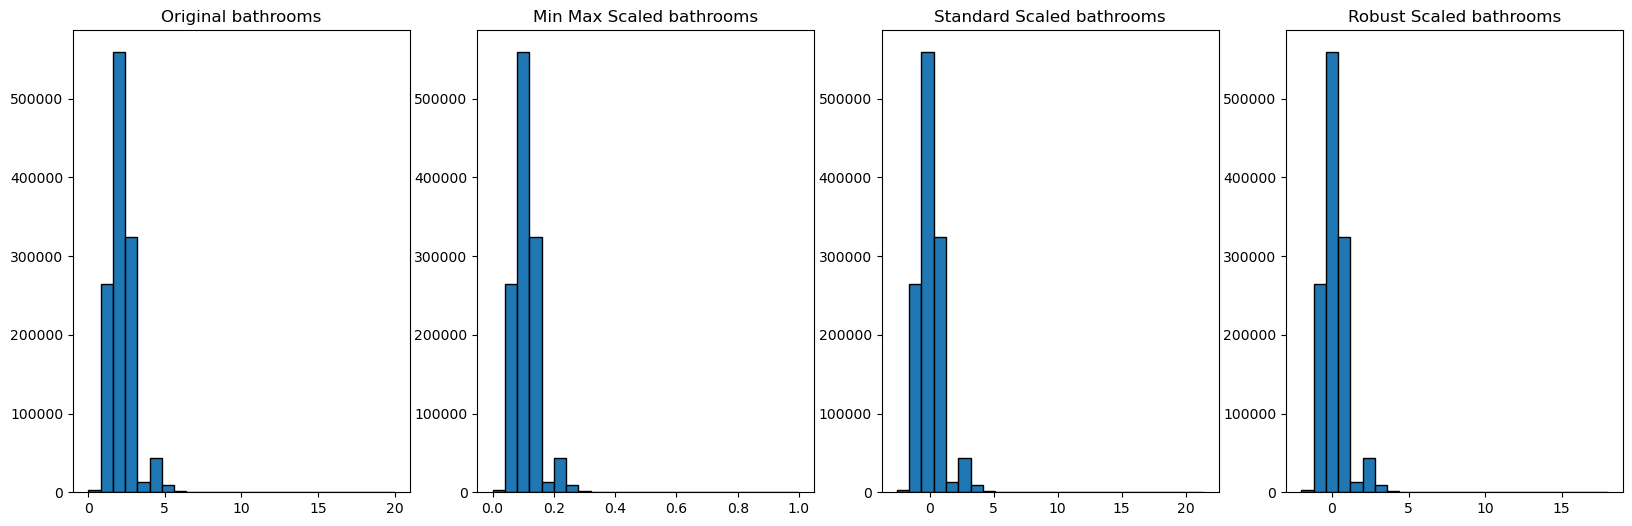

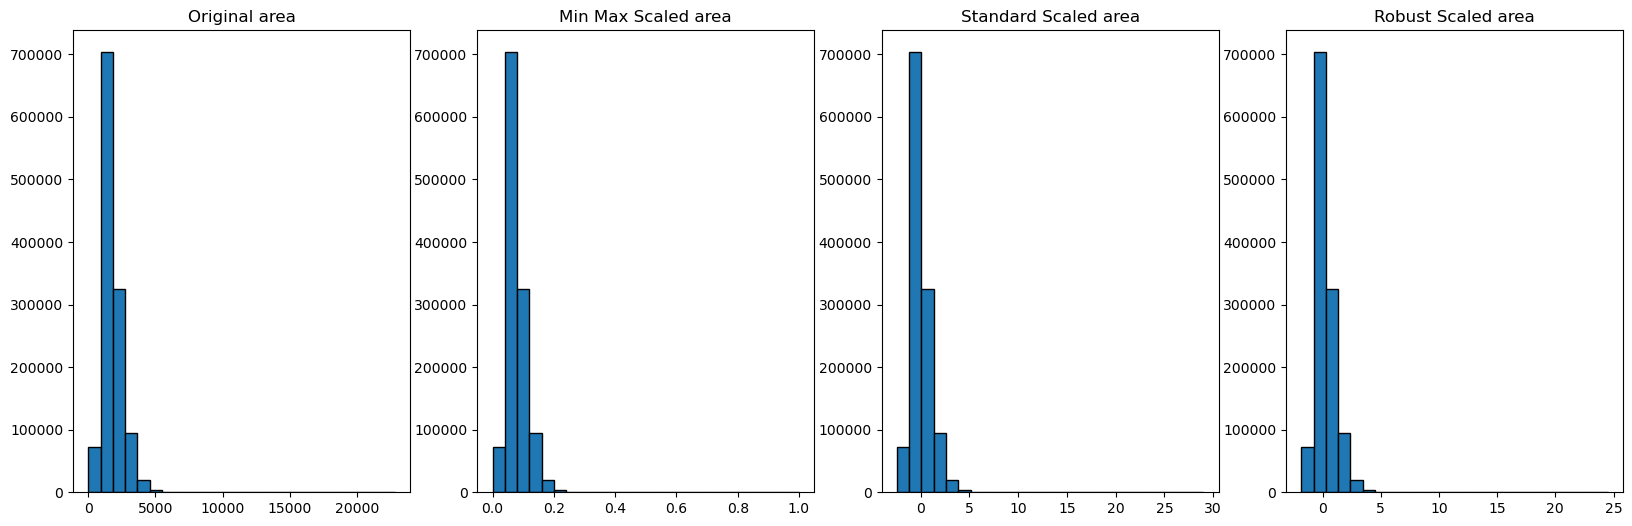

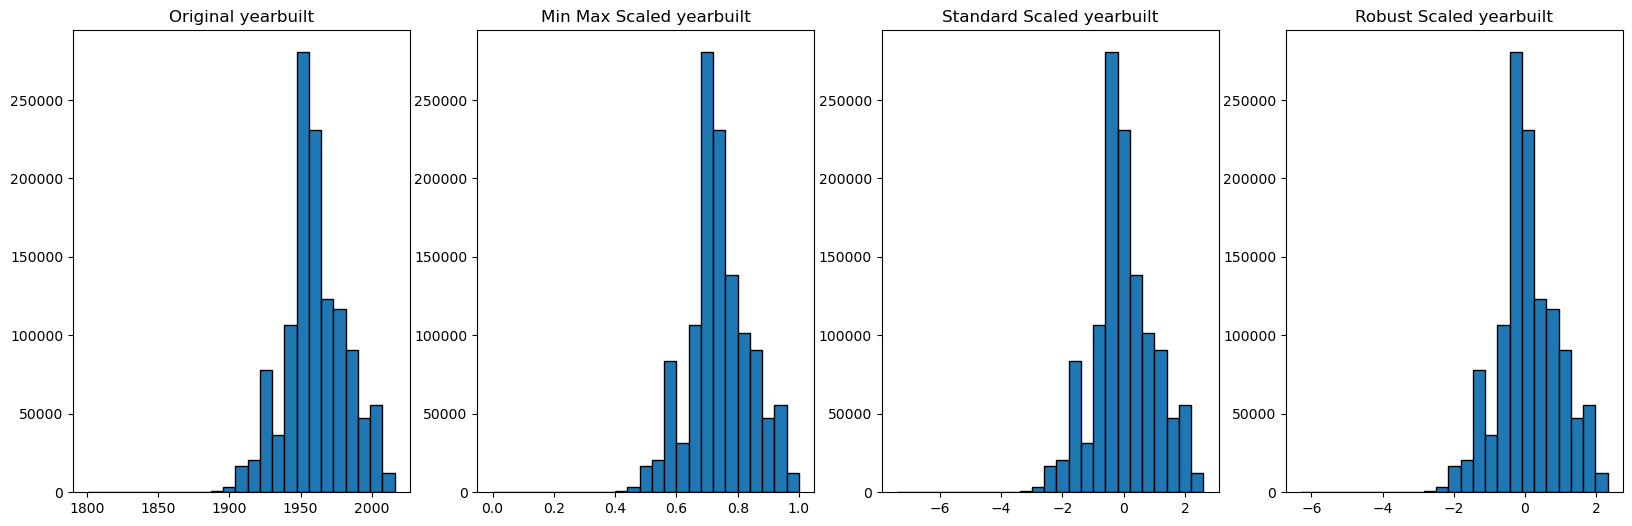

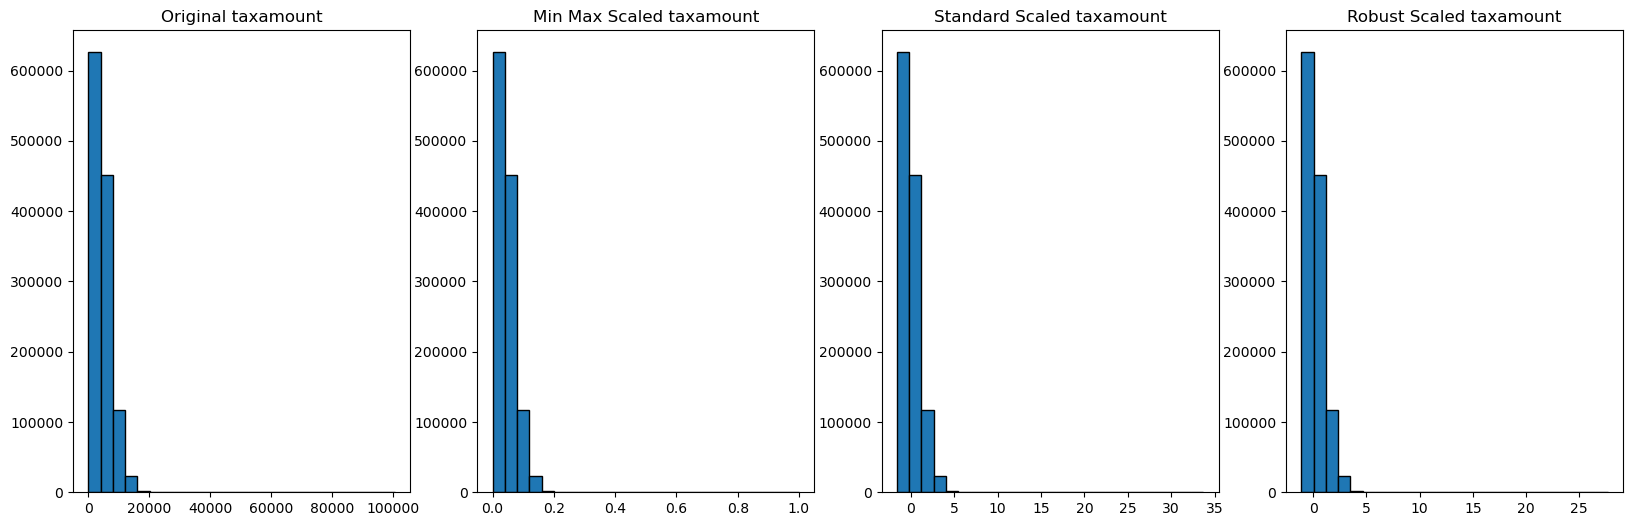

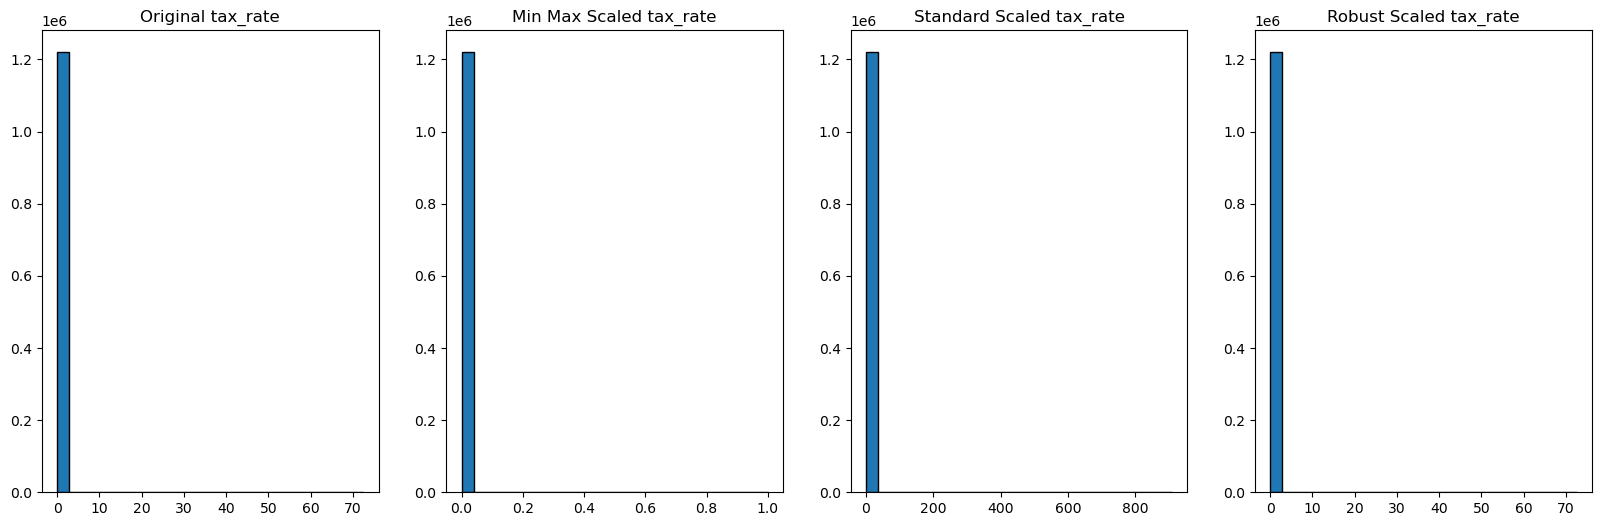

In [13]:
columns=['bedrooms','bathrooms','area','yearbuilt','taxamount','tax_rate']

for col in columns:
    plt.figure(figsize=(20, 6))
    plt.subplot(141)
    plt.hist(X_train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(142)
    plt.hist(X_tr_mm_scaler[col], bins=25, ec='black')
    plt.title(f'Min Max Scaled {col}')
    plt.subplot(143)
    plt.hist(X_tr_std_scaler[col], bins=25, ec='black')
    plt.title(f'Standard Scaled {col}')
    plt.subplot(144)
    plt.hist(X_tr_rbs_scaler[col], bins=25, ec='black')
    plt.title(f'Robust Scaled {col}')
    plt.show()
    
    

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [14]:
X_tr_mm_scaler

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
1571798,0.2500,0.125,0.130971,0.953488,0.135544,0.000276,Orange
1723553,0.1875,0.100,0.132111,0.818605,0.057342,0.000138,LA
718174,0.2500,0.150,0.112768,0.860465,0.049128,0.000138,LA
1663205,0.1875,0.050,0.069652,0.734884,0.040038,0.000138,LA
1087891,0.1875,0.100,0.075705,0.748837,0.026856,0.000138,Ventura
...,...,...,...,...,...,...,...
531544,0.1875,0.100,0.070573,0.851163,0.029777,0.000138,LA
424806,0.1250,0.050,0.039432,0.637209,0.032985,0.000138,LA
518081,0.1875,0.150,0.080705,0.716279,0.017115,0.000138,LA
669341,0.1875,0.100,0.061626,0.720930,0.045299,0.000138,LA


In [15]:
X_tr_mm_inv

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate,county
0,4.0,2.5,2987.0,2006.0,13617.38,0.02,Orange
1,3.0,2.0,3013.0,1977.0,5768.57,0.01,LA
2,4.0,3.0,2572.0,1986.0,4944.11,0.01,LA
3,3.0,1.0,1589.0,1959.0,4031.78,0.01,LA
4,3.0,2.0,1727.0,1962.0,2708.80,0.01,Ventura
...,...,...,...,...,...,...,...
1219897,3.0,2.0,1610.0,1984.0,3001.96,0.01,LA
1219898,2.0,1.0,900.0,1938.0,3323.92,0.01,LA
1219899,3.0,3.0,1841.0,1955.0,1731.15,0.01,LA
1219900,3.0,2.0,1406.0,1956.0,4559.86,0.01,LA


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [16]:
quant_norm, X_tr_quant_norm, quant, X_tr_quant = w.get_quant_normal(X_train)

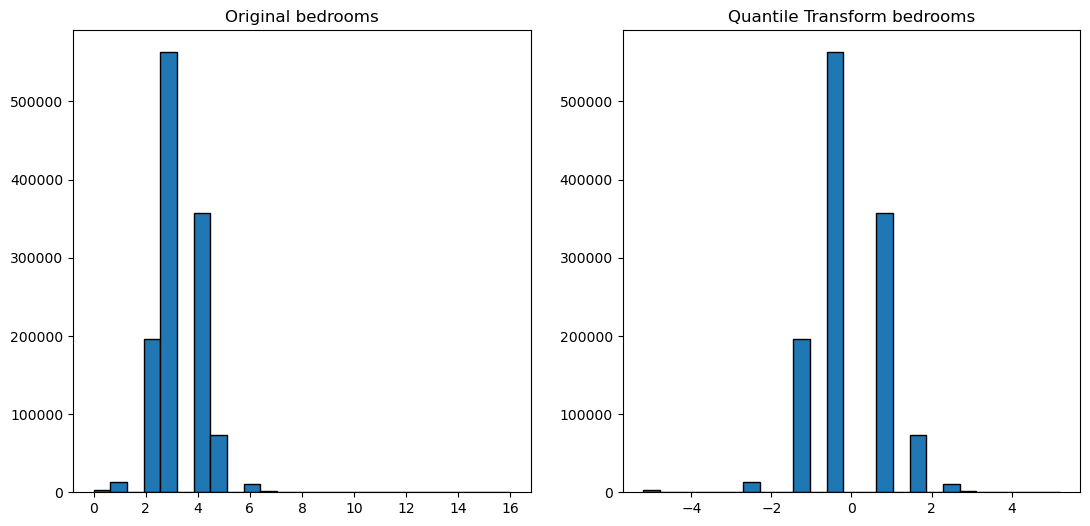

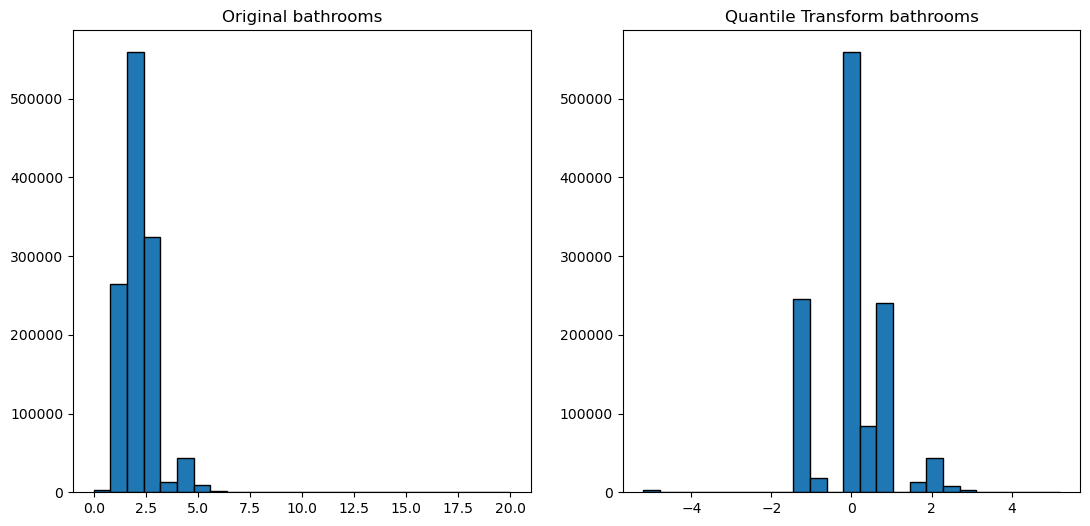

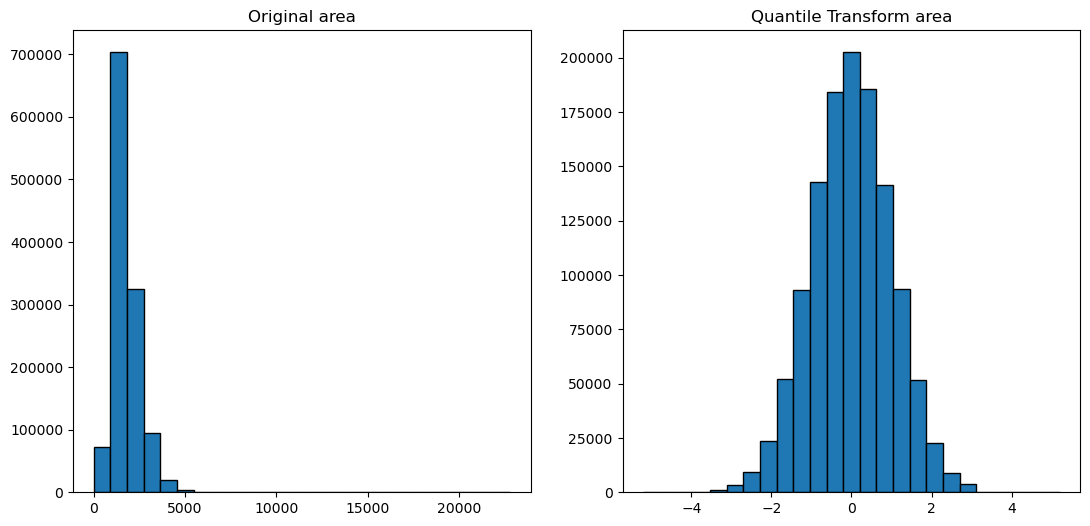

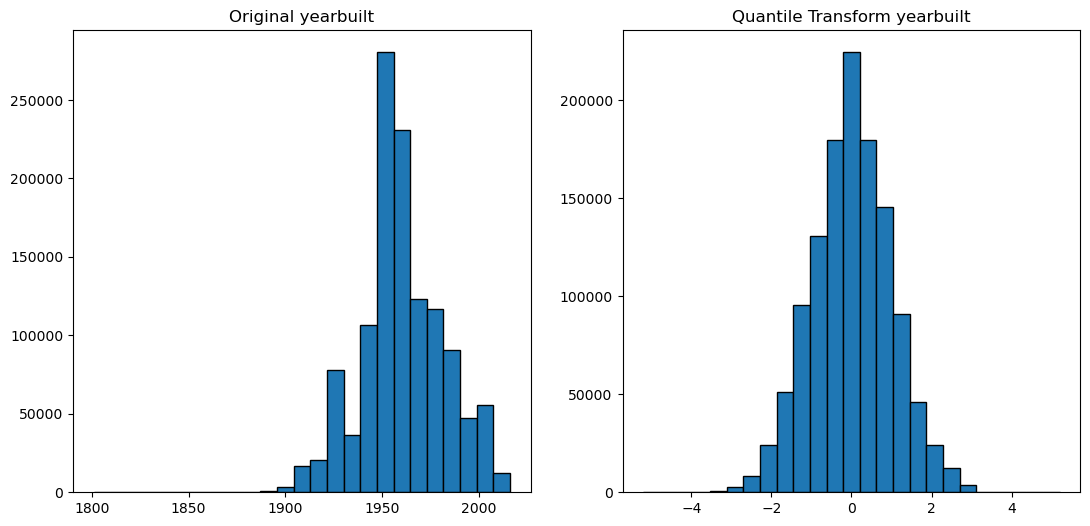

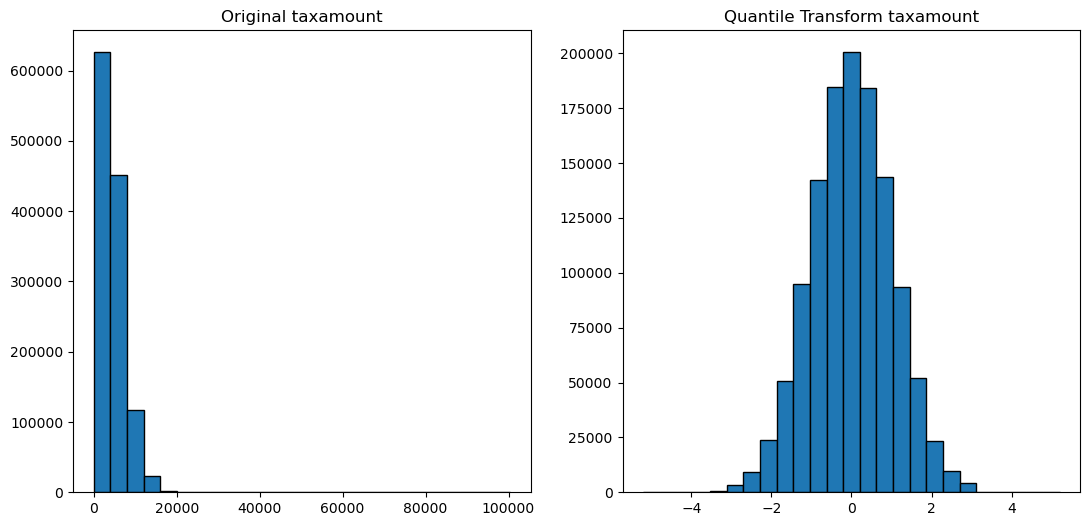

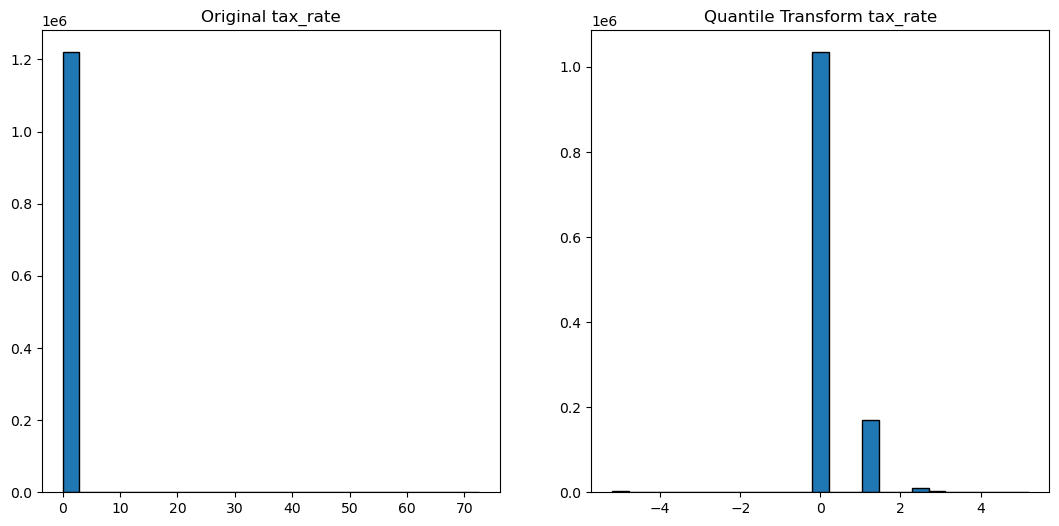

In [17]:
columns=['bedrooms','bathrooms','area','yearbuilt','taxamount','tax_rate']

for col in columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(X_train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(X_tr_quant_norm[col], bins=25, ec='black')
    plt.title(f'Quantile Transform {col}')
    plt.show()

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

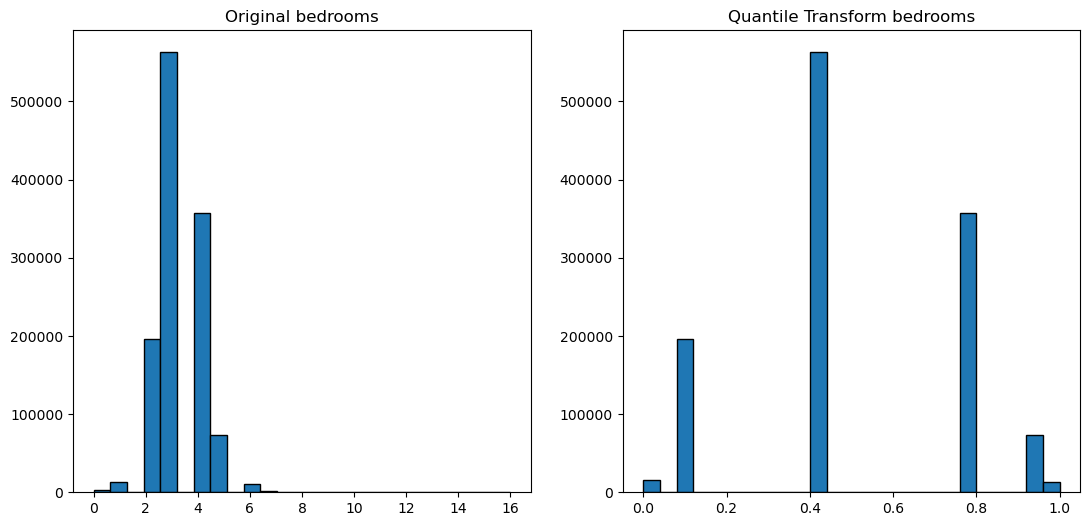

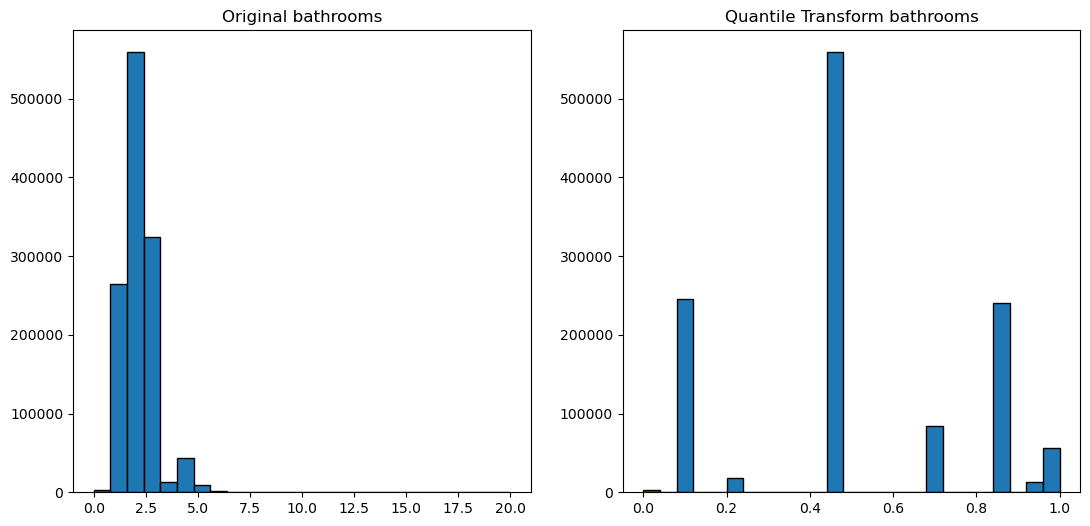

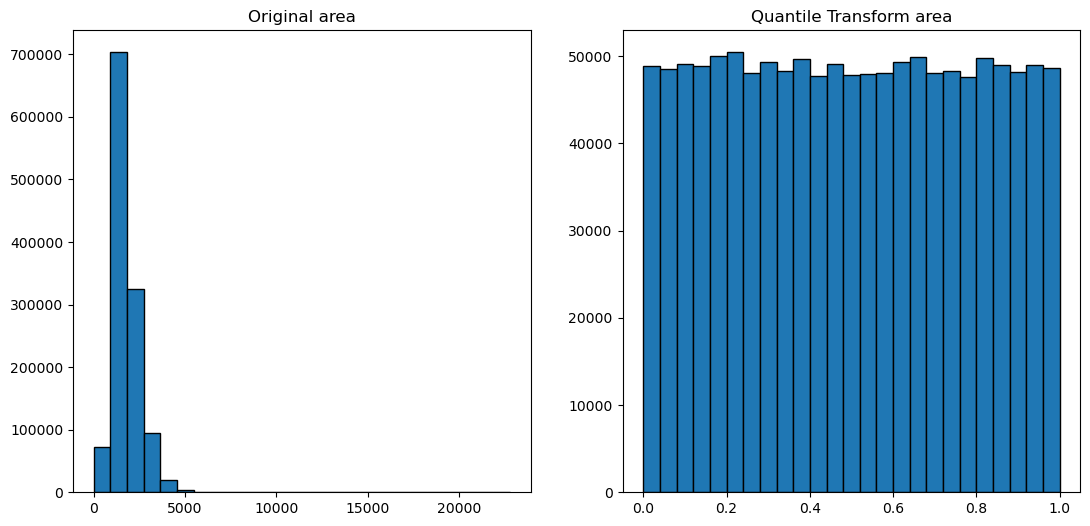

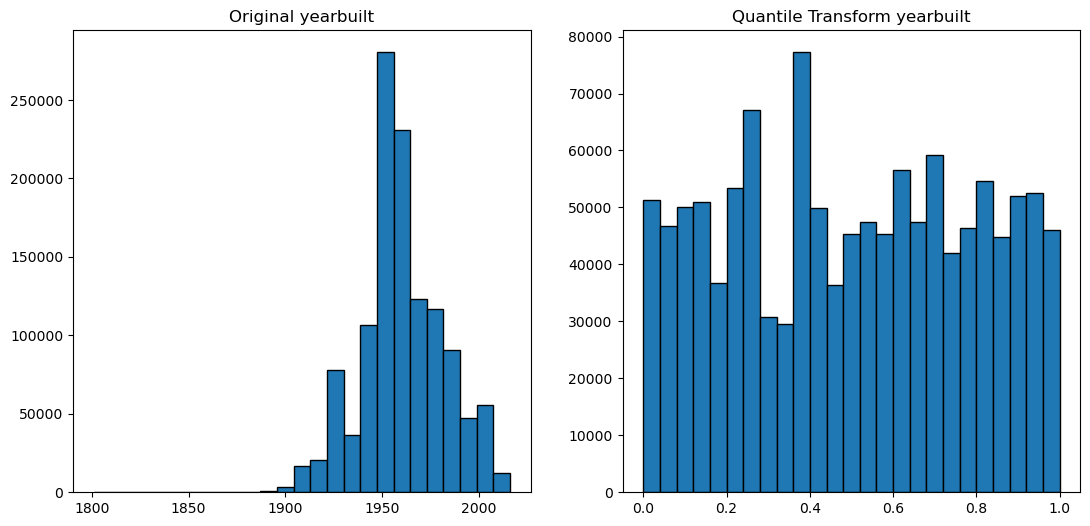

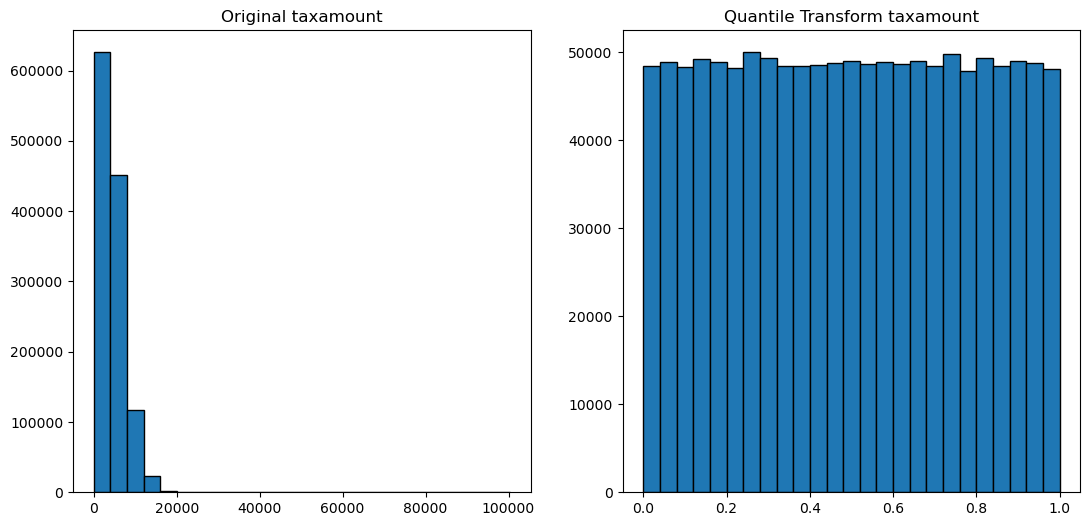

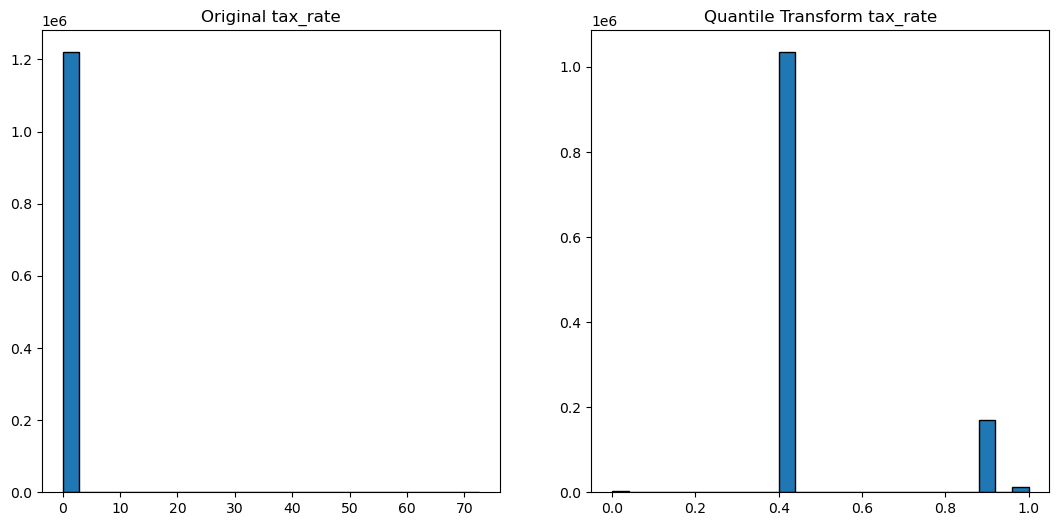

In [18]:
columns=['bedrooms','bathrooms','area','yearbuilt','taxamount','tax_rate']

for col in columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(X_train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(X_tr_quant[col], bins=25, ec='black')
    plt.title(f'Quantile Transform {col}')
    plt.show()

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [20]:
def std_trn_scaler(train, validate, test):
    columns=['bedrooms', 'bathrooms','area','yearbuilt','taxamount','tax_rate']    

    X_tr_std, X_v_std, X_ts_std = train, validate, test
    
    # Create a MinMaxScaler object
    std_scaler = StandardScaler()

    # Fit the scaler to the training data and transform it
    X_tr_std[columns] = std_scaler.fit_transform(X_tr_std[columns])
    
    #using our scaler on validate
    X_v_std[columns] = std_scaler.transform(X_v_std[columns])
    
    #using our scaler on test
    X_ts_std[columns] = std_scaler.transform(X_ts_std[columns])
    
    return X_tr_std, X_v_std, X_ts_std


In [21]:
X_tr_std, X_v_std, X_ts_std = std_trn_scaler(train, validate, test)
X_tr_std

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,0.826506,0.429214,1.701087,885000,2.122405,3.200824,Orange,0.102454
1723553,-0.287794,-0.169257,1.736898,489511,0.776777,0.442418,LA,-0.022884
718174,0.826506,1.027685,1.129485,390915,1.194385,0.152668,LA,-0.022884
1663205,-0.287794,-1.366198,-0.224452,321758,-0.058441,-0.167964,LA,-0.022884
1087891,-0.287794,-0.169257,-0.034377,231737,0.080762,-0.632915,Ventura,-0.022884
...,...,...,...,...,...,...,...,...
531544,-0.287794,-0.169257,-0.195528,226464,1.101584,-0.529886,LA,-0.022884
424806,-1.402093,-1.366198,-1.173448,227271,-1.032862,-0.416736,LA,-0.022884
518081,-0.287794,1.027685,0.122641,125533,-0.244045,-0.976503,LA,-0.022884
669341,-0.287794,-0.169257,-0.476508,364412,-0.197644,0.017626,LA,-0.022884
